In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

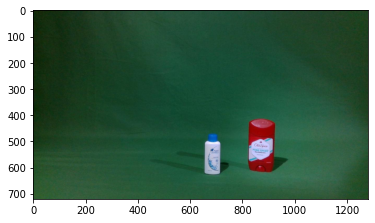

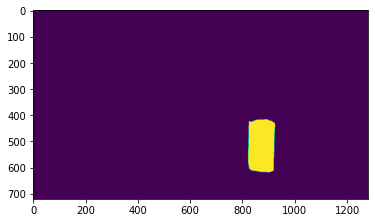

In [4]:
original = '../COTSDataset-master/Part 2 - Multiple Objects/wash_no/2_colour.jpeg'
mask = '../COTSDataset-master/Part 2 - Multiple Objects/wash_no/masks/wash_no_3_colour_mask_5_mask.png'

S2 = cv2.imread(original)
S2 = cv2.cvtColor(S2, cv2.COLOR_BGR2RGB)

Mask = cv2.imread(mask)
Mask = cv2.cvtColor(Mask, cv2.COLOR_BGR2GRAY)

plt.imshow(S2)
plt.show()

plt.imshow(Mask)
plt.show()

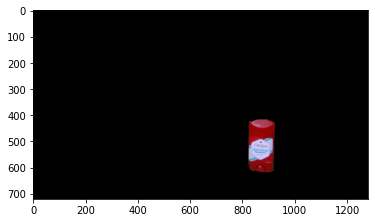

In [5]:
def ExtractObject(S2, objectMask):
    return cv2.bitwise_and(S2, S2, mask=objectMask)

extractedObject = ExtractObject(S2, Mask)

plt.imshow(extractedObject)
plt.show()

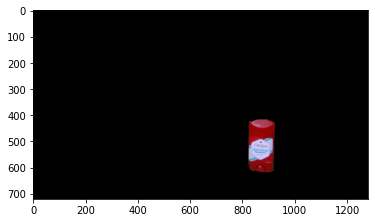

In [6]:
def ApplyFilter(ExtractedObject, FilterIndex):
    
    if FilterIndex == 0:
        return ExtractedObject
    
    if FilterIndex == 1:
        #Sobel Kernel
        sobel = cv2.Sobel(ExtractedObject,cv2.CV_64F,1,0,ksize=3)
        abs_64 = np.absolute(sobel)
        return np.uint8(abs_64)
            
    if FilterIndex == 2:
        # Gaussian Blurring
        return cv2.GaussianBlur(ExtractedObject, (9,9), cv2.BORDER_DEFAULT)
    
    if FilterIndex == 3:
        #Bilinear Kernal
        Bilinear = np.array([[1, 2, 1],
                     [1, 4, 1],
                     [1, 2, 1]])
        BWeight = 1/16
        return cv2.filter2D(ExtractedObject, -1, BWeight*Bilinear)
    
newImg = ApplyFilter(extractedObject.copy(), 0)    
    
plt.imshow(newImg)
plt.show()

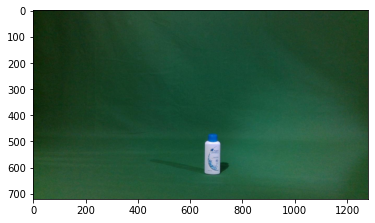

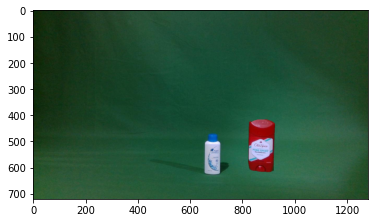

In [8]:
def ObjectBlending(S1, FilteredExObject):
    
    S1_copy = S1.copy()
    for i, y in enumerate(FilteredExObject):
        for j, x in enumerate(y):
            if np.sum(FilteredExObject[i][j]) > 0:
                S1_copy[i][j] = x 
                
    #alpha = 0.5
    #beta = (1.0 - alpha)
    #dst = cv2.addWeighted(S1, alpha, FilteredExObject, beta, 0.0)
    
    return S1_copy

original = '../COTSDataset-master/Part 2 - Multiple Objects/wash_no/1_colour.jpeg'

S1 = cv2.imread(original)
S1 = cv2.cvtColor(S1, cv2.COLOR_BGR2RGB)
plt.imshow(S1)
plt.show()

BlendingResult = ObjectBlending(S1, newImg)

plt.imshow(BlendingResult)
plt.show()

In [9]:
def CompareResult(BlendingResult, S2, metric):
    if metric == 1:
         return np.sum((BlendingResult -  S2) ** 2) #SSD
    else:
         return np.mean((BlendingResult - S2) ** 2) #MSE
        
error = CompareResult(BlendingResult, S2, 2)
print(error)    

12.100060040509259


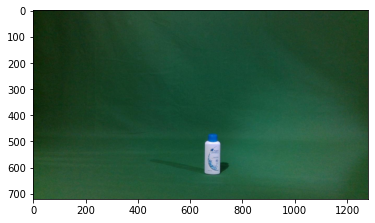

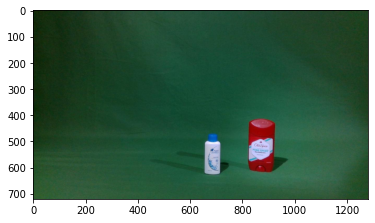

In [10]:
plt.imshow(S1)
plt.show()

plt.imshow(S2)
plt.show()

Referance: https://stackoverflow.com/questions/64491530/how-to-remove-the-background-from-a-picture-in-opencv-python


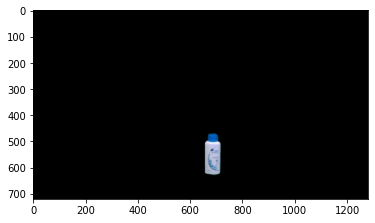

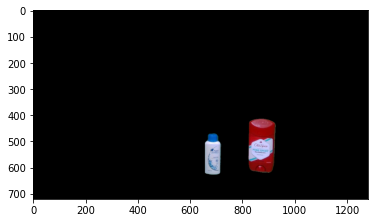

In [11]:
def RemoveGreen(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    thresh = cv2.inRange(hsv, (20, 20, 20), (90, 255,255)) #Get image mask between two ranges

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    mask = 255 - morph
    
    result = cv2.bitwise_and(img, img, mask=mask)
  
    return result

S1_noBackground = RemoveGreen(S1)

plt.imshow(S1_noBackground)
plt.show()

S2_noBackground = RemoveGreen(S2)

plt.imshow(S2_noBackground)
plt.show()

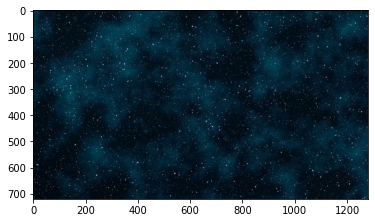

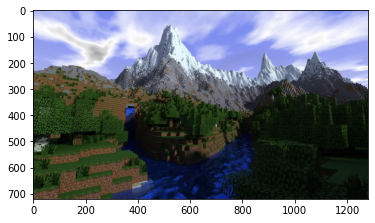

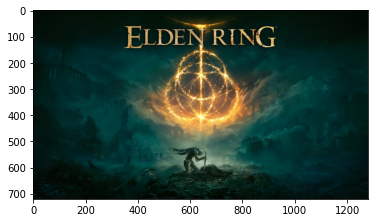

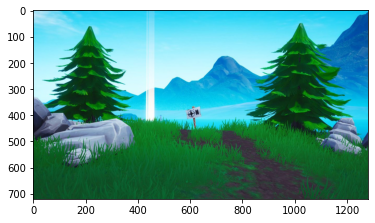

In [12]:
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("Images/*.jpg")]

for image in images:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

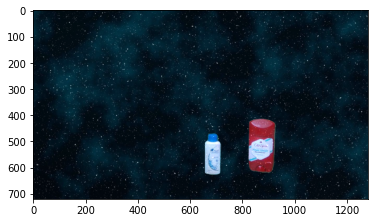

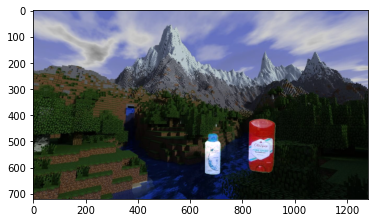

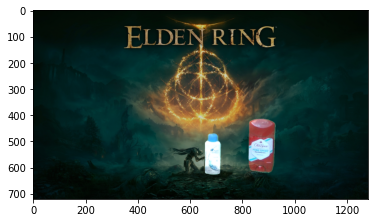

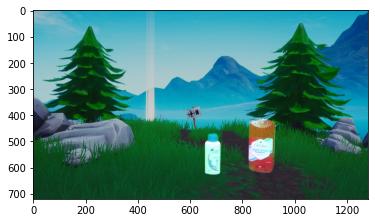

In [13]:
def NewBackground(imgNoBg, NewBackground):  
    return cv2.addWeighted(imgNoBg, 1,  NewBackground, 0.8, 0.0)

for image in images:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = NewBackground(S2_noBackground, image)
    plt.imshow(result)
    plt.show()